# Mean Shift

## Reading dataset

In [1]:
from assignment_3.clustering.io import read_small_dataset
from assignment_3.clustering.model import MeanShiftEvaluation, DataClusterSplit

In [2]:
data = read_small_dataset().reduce_to_percentage(0.1)
data

2023-02-26 18:13:05.438 | INFO     | assignment_3.clustering.io:read_small_dataset:50 - Reading datasets


[Features: 784; Length: 1050]

In [3]:
X, y = data

## Construct iteration

In [4]:
mean_shift_evaluation = MeanShiftEvaluation(
    data=data,
    n_components=[2, 5, 10, 20, 30],
    hyperparameter=[0.1, 0.2, 0.3]
    #n_components=[2, 5, 10, 20, 30, 50, 100, 130, 170, 200],
    #hyperparameter=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75]
)
mean_shift_evaluation

MeanShiftEvaluation [n_components: [2, 5, 10, 20, 30], kernel-size: [0.1, 0.2, 0.3]]

In [5]:
%%time
mean_shift_evaluation.evaluate()

Processing kernel size: 0.1
  > Processed number of component: 2 [8.97373 s] 
  > Processed number of component: 5 [2.81039 s] 
  > Processed number of component: 10 [1.29096 s] 
  > Processed number of component: 20 [0.96488 s] 
  > Processed number of component: 30 [1.04770 s] 
Processing kernel size: 0.2
  > Processed number of component: 2 [10.16082 s] 
  > Processed number of component: 5 [4.85525 s] 
  > Processed number of component: 10 [1.59880 s] 
  > Processed number of component: 20 [0.93523 s] 
  > Processed number of component: 30 [0.89715 s] 
Processing kernel size: 0.3
  > Processed number of component: 2 [6.21888 s] 
  > Processed number of component: 5 [8.47025 s] 
  > Processed number of component: 10 [1.85444 s] 
  > Processed number of component: 20 [1.12781 s] 
  > Processed number of component: 30 [1.21153 s] 
Wall time: 53.3 s


In [6]:
mean_shift_evaluation.results

{0.1: {2: {'score': 0.8602914340187934, 'n_clusters': 14, 'time': 8.9737334},
  5: {'score': 0.9029551954242135,
   'n_clusters': 628,
   'time': 2.810386000000001},
  10: {'score': 0.9004512233873531,
   'n_clusters': 1000,
   'time': 1.2909641999999977},
  20: {'score': 0.9001770393572109,
   'n_clusters': 1044,
   'time': 0.9648763000000002},
  30: {'score': 0.9001697762040946,
   'n_clusters': 1047,
   'time': 1.0477045999999994}},
 0.2: {2: {'score': 0.5316464660220618, 'n_clusters': 2, 'time': 10.1608171},
  5: {'score': 0.8901157565027917,
   'n_clusters': 57,
   'time': 4.855246000000001},
  10: {'score': 0.9032439057605883,
   'n_clusters': 814,
   'time': 1.5987973999999952},
  20: {'score': 0.9006091969676335,
   'n_clusters': 985,
   'time': 0.9352283999999997},
  30: {'score': 0.9002496708883744,
   'n_clusters': 1027,
   'time': 0.8971475999999967}},
 0.3: {2: {'score': 0.09983567116074266,
   'n_clusters': 1,
   'time': 6.218877500000005},
  5: {'score': 0.39933905306641

In [7]:
mean_shift_evaluation.best_model

MeanShift[N-rows: 1050; N-components: 10; , Score: 0.907572745017931, N-clusters: 267] [KernelSize: 0.3] 

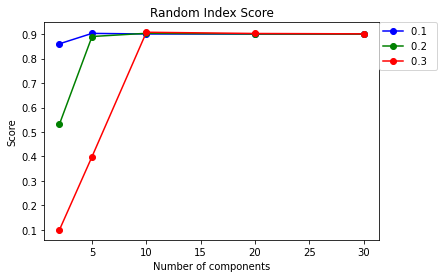

In [8]:
mean_shift_evaluation.plot_score()

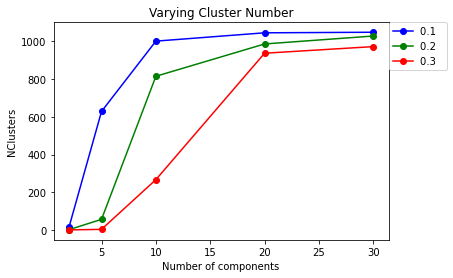

In [9]:
mean_shift_evaluation.plot_n_clusters()

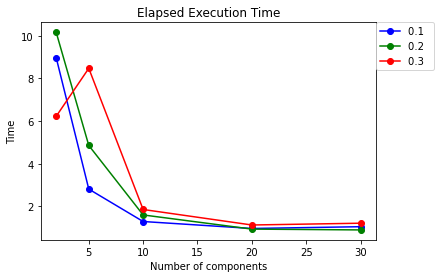

In [10]:
mean_shift_evaluation.plot_time()

## Best model

In [11]:
best = mean_shift_evaluation.best_model

In [12]:
best

MeanShift[N-rows: 1050; N-components: 10; , Score: 0.907572745017931, N-clusters: 267] [KernelSize: 0.3] 

In [13]:
clusters = DataClusterSplit(data=data, index=best.out)

In [14]:
clusters

Cluster Data Split [Data: 1050, Clusters: 267,Mean-per-Cluster: 3.932584269662921, Score: 0.907572745017931] 

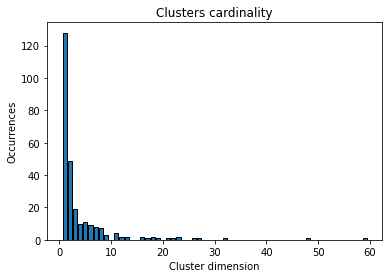

In [15]:
clusters.frequencies_histo()

In [16]:
clusters_best = clusters.get_sub_clusters(a=15)

In [17]:
clusters_best

Cluster Data Split [Data: 385, Clusters: 15,Mean-per-Cluster: 25.666666666666668, Score: 0.8840503246753246] 

In [25]:
clusters_best.rand_index_score

0.8840503246753246

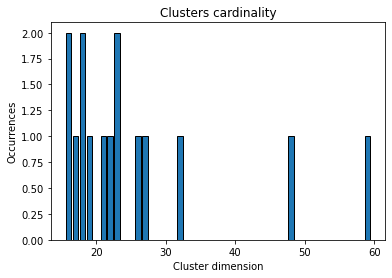

In [18]:
clusters_best.frequencies_histo()

[Mode 1: {1: 54, 7: 2, 9: 2, 6: 1}] 


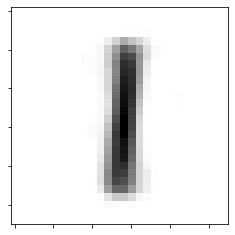

[Mode 1: {1: 47, 2: 1}] 


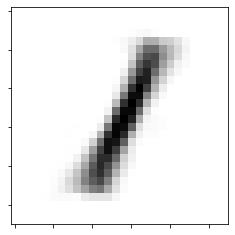

[Mode 6: {6: 32}] 


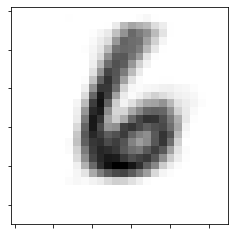

[Mode 9: {9: 16, 4: 10, 8: 1}] 


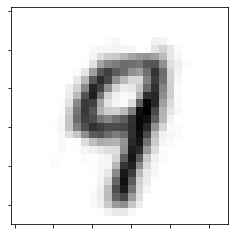

[Mode 9: {9: 17, 4: 4, 7: 1}] 


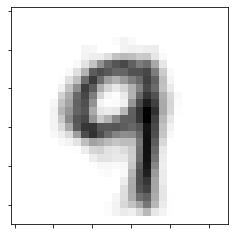

[Mode 7: {7: 23}] 


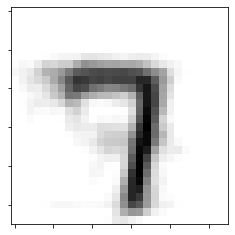

[Mode 8: {8: 18, 3: 3}] 


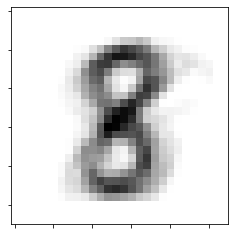

[Mode 4: {4: 15, 9: 6, 7: 1, 5: 1}] 


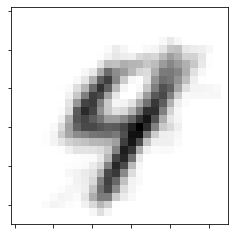

[Mode 7: {7: 8, 9: 8, 4: 2, 8: 1}] 


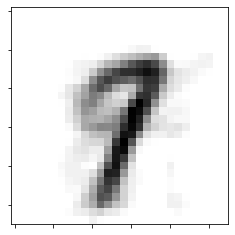

[Mode 7: {7: 24, 9: 2}] 


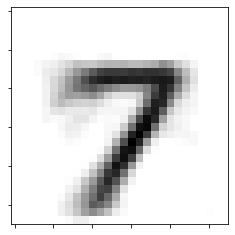

[Mode 4: {4: 17, 9: 1}] 


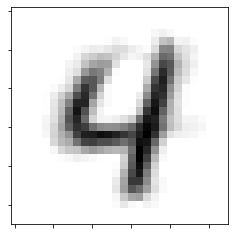

[Mode 5: {5: 6, 6: 4, 4: 3, 9: 1, 0: 1, 8: 1}] 


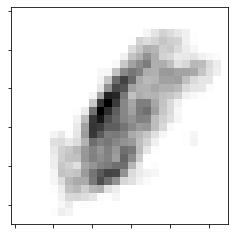

[Mode 3: {3: 16}] 


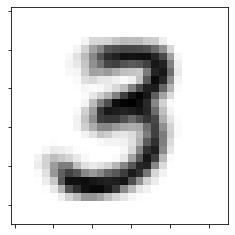

[Mode 3: {3: 14, 8: 3, 9: 1}] 


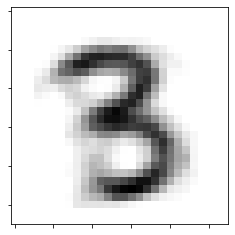

[Mode 9: {9: 10, 7: 4, 1: 1, 4: 1, 3: 1}] 


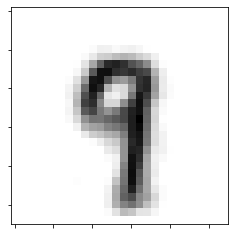

In [19]:
clusters_best.plot_mean_digit()

In [20]:
clusters_bad = clusters.get_sub_clusters(b=1)

In [21]:
clusters_bad

Cluster Data Split [Data: 128, Clusters: 128,Mean-per-Cluster: 1, Score: 0.8709399606299213] 

[Mode 0: {0: 1}] 


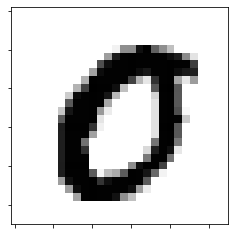

[Mode 0: {0: 1}] 


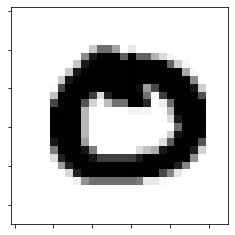

[Mode 0: {0: 1}] 


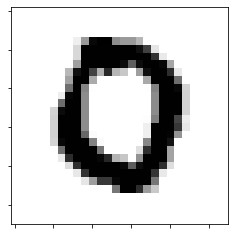

[Mode 0: {0: 1}] 


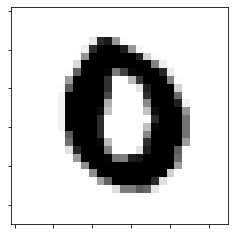

[Mode 8: {8: 1}] 


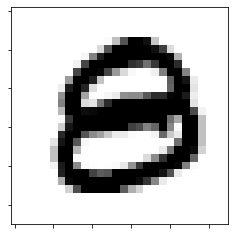

[Mode 0: {0: 1}] 


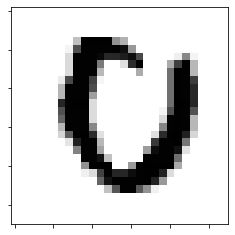

[Mode 0: {0: 1}] 


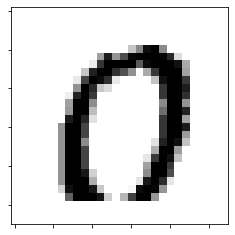

[Mode 6: {6: 1}] 


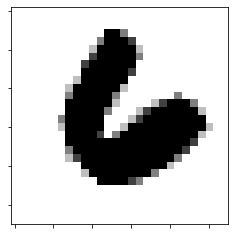

[Mode 0: {0: 1}] 


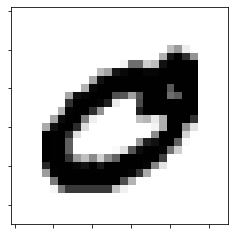

[Mode 5: {5: 1}] 


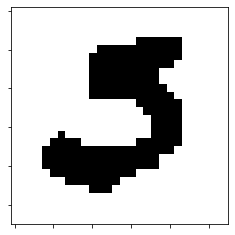

[Mode 5: {5: 1}] 


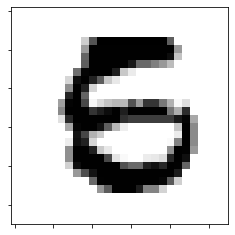

[Mode 2: {2: 1}] 


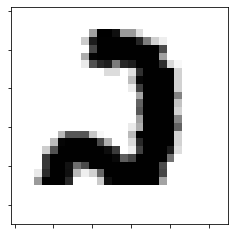

[Mode 6: {6: 1}] 


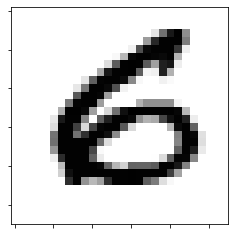

[Mode 9: {9: 1}] 


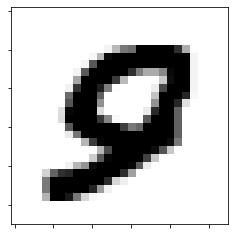

[Mode 0: {0: 1}] 


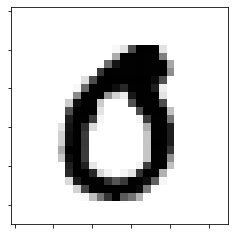

[Mode 3: {3: 1}] 


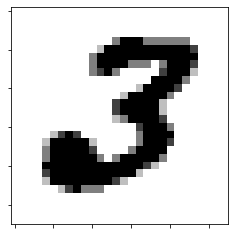

[Mode 8: {8: 1}] 


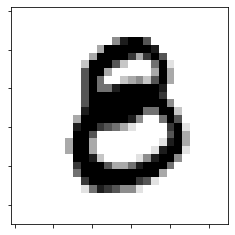

[Mode 2: {2: 1}] 


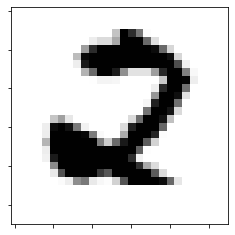

[Mode 7: {7: 1}] 


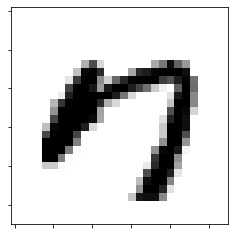

[Mode 6: {6: 1}] 


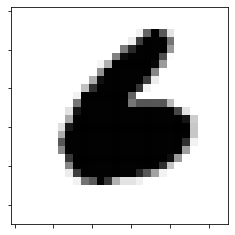

[Mode 0: {0: 1}] 


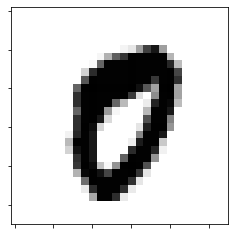

[Mode 3: {3: 1}] 


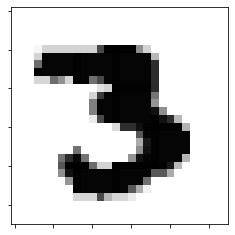

[Mode 5: {5: 1}] 


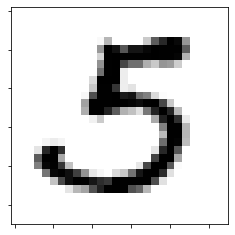

[Mode 3: {3: 1}] 


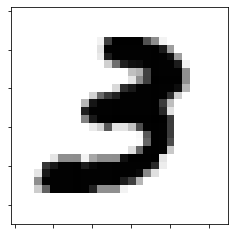

[Mode 0: {0: 1}] 


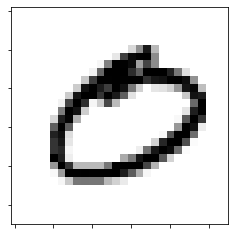

[Mode 5: {5: 1}] 


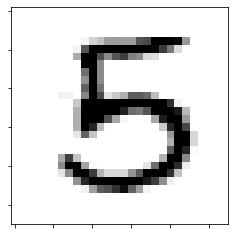

[Mode 0: {0: 1}] 


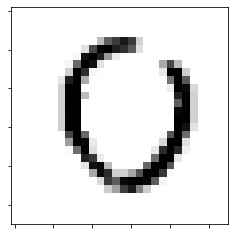

[Mode 6: {6: 1}] 


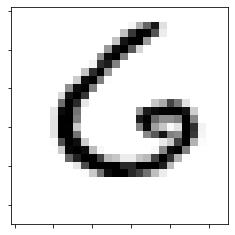

[Mode 3: {3: 1}] 


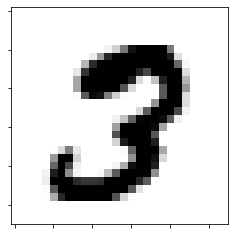

[Mode 6: {6: 1}] 


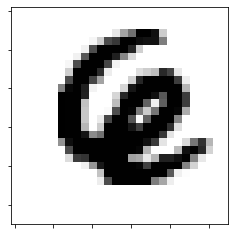

[Mode 8: {8: 1}] 


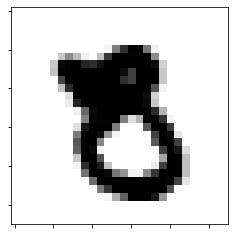

[Mode 4: {4: 1}] 


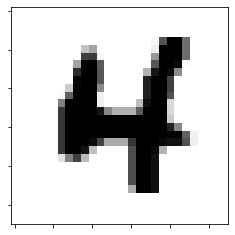

[Mode 6: {6: 1}] 


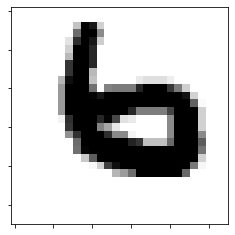

[Mode 3: {3: 1}] 


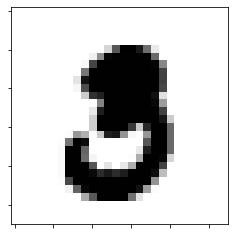

[Mode 8: {8: 1}] 


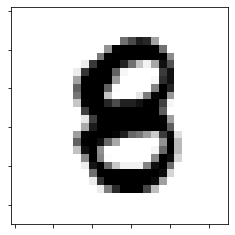

[Mode 6: {6: 1}] 


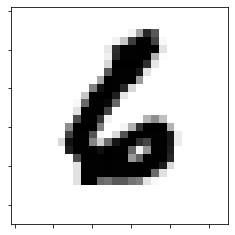

[Mode 8: {8: 1}] 


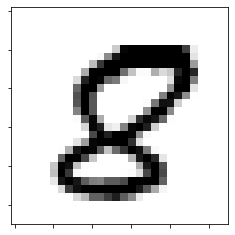

[Mode 0: {0: 1}] 


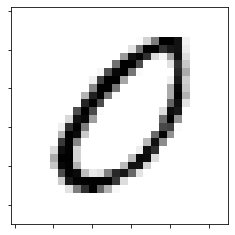

[Mode 8: {8: 1}] 


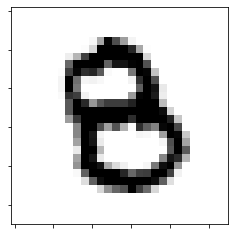

[Mode 3: {3: 1}] 


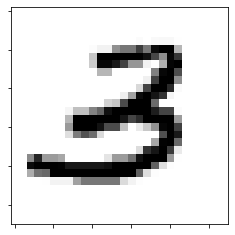

[Mode 5: {5: 1}] 


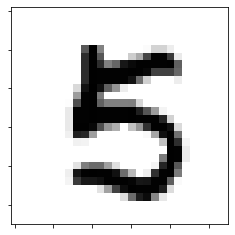

[Mode 0: {0: 1}] 


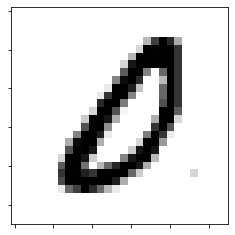

[Mode 6: {6: 1}] 


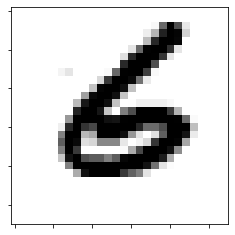

[Mode 3: {3: 1}] 


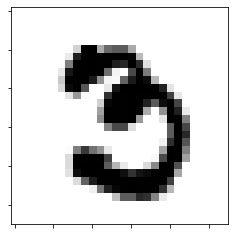

[Mode 8: {8: 1}] 


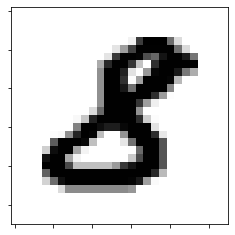

[Mode 6: {6: 1}] 


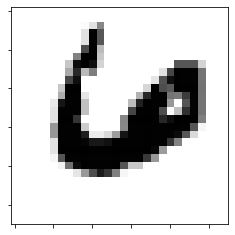

[Mode 0: {0: 1}] 


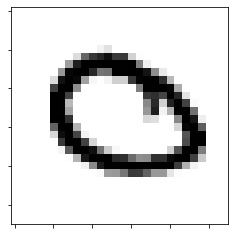

[Mode 3: {3: 1}] 


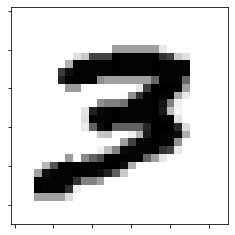

[Mode 0: {0: 1}] 


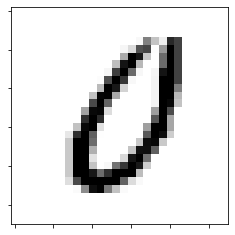

[Mode 2: {2: 1}] 


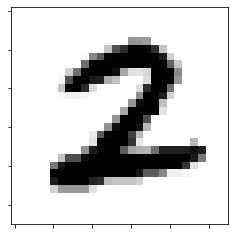

[Mode 2: {2: 1}] 


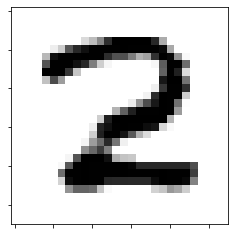

[Mode 2: {2: 1}] 


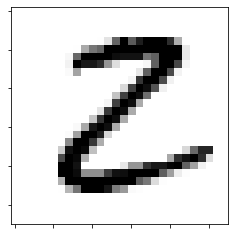

[Mode 5: {5: 1}] 


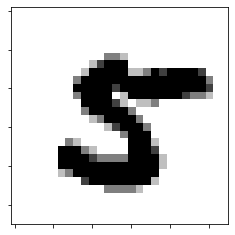

[Mode 4: {4: 1}] 


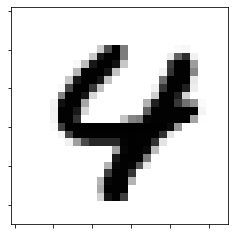

[Mode 4: {4: 1}] 


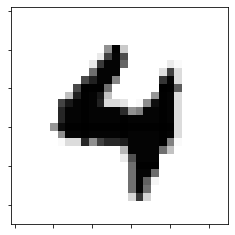

[Mode 5: {5: 1}] 


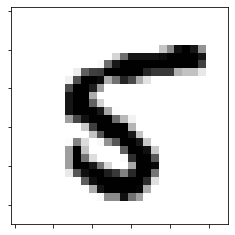

[Mode 2: {2: 1}] 


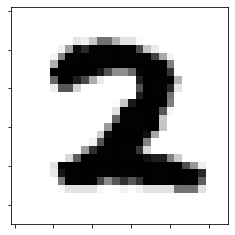

[Mode 4: {4: 1}] 


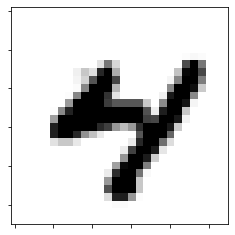

[Mode 3: {3: 1}] 


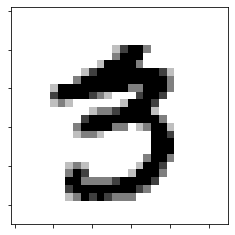

[Mode 4: {4: 1}] 


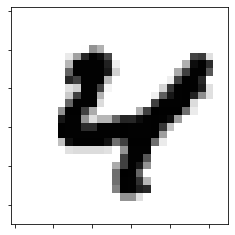

[Mode 4: {4: 1}] 


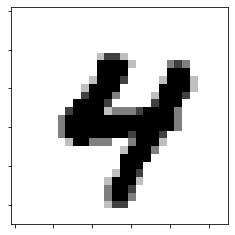

[Mode 2: {2: 1}] 


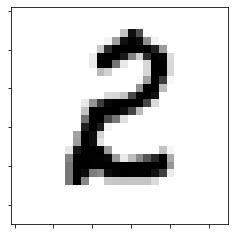

[Mode 2: {2: 1}] 


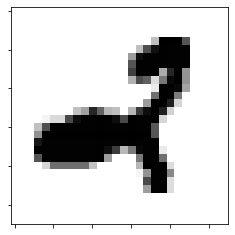

[Mode 2: {2: 1}] 


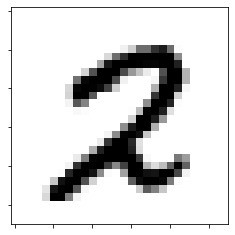

[Mode 2: {2: 1}] 


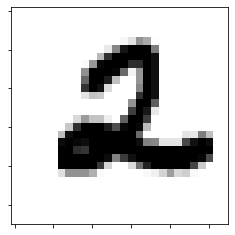

[Mode 2: {2: 1}] 


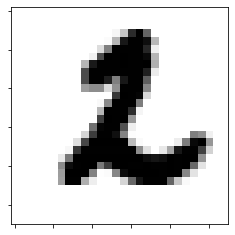

[Mode 8: {8: 1}] 


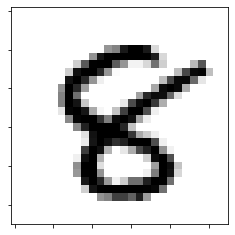

[Mode 2: {2: 1}] 


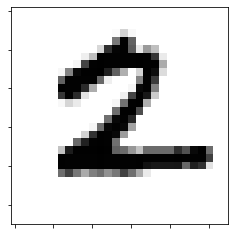

[Mode 8: {8: 1}] 


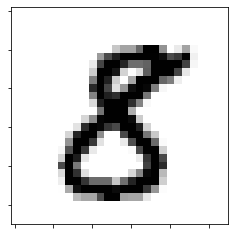

[Mode 5: {5: 1}] 


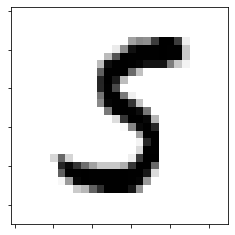

[Mode 3: {3: 1}] 


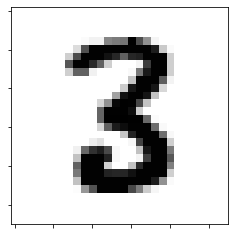

[Mode 2: {2: 1}] 


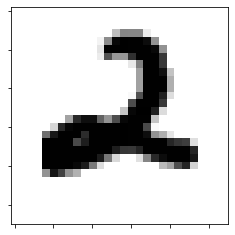

[Mode 2: {2: 1}] 


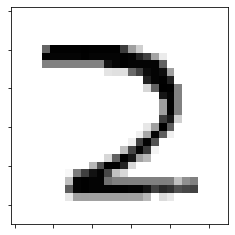

[Mode 5: {5: 1}] 


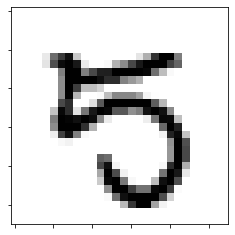

[Mode 4: {4: 1}] 


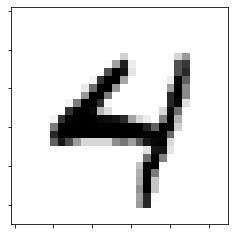

[Mode 9: {9: 1}] 


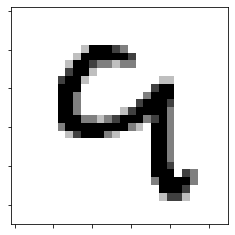

[Mode 5: {5: 1}] 


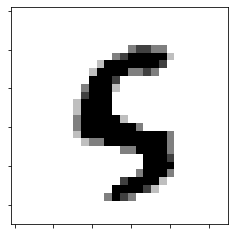

[Mode 8: {8: 1}] 


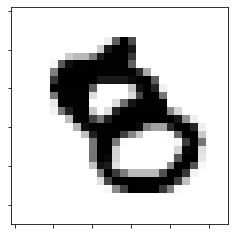

[Mode 8: {8: 1}] 


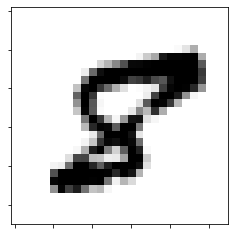

[Mode 5: {5: 1}] 


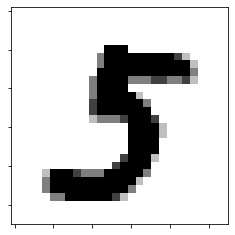

[Mode 4: {4: 1}] 


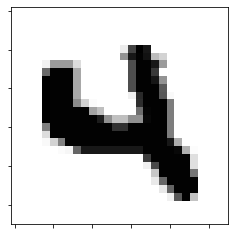

[Mode 2: {2: 1}] 


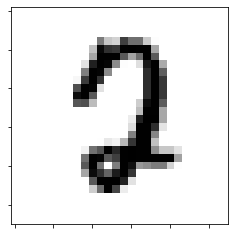

[Mode 6: {6: 1}] 


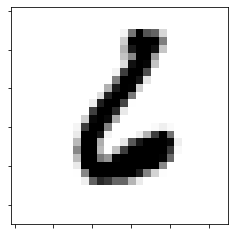

[Mode 6: {6: 1}] 


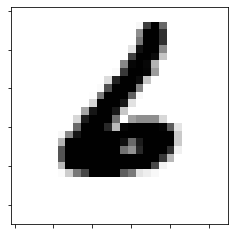

[Mode 8: {8: 1}] 


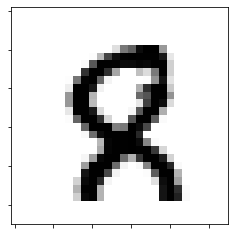

[Mode 4: {4: 1}] 


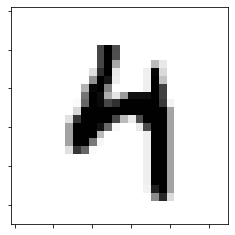

[Mode 3: {3: 1}] 


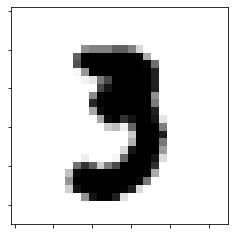

[Mode 2: {2: 1}] 


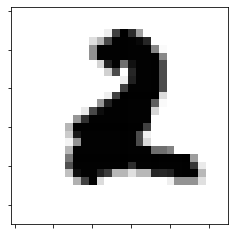

[Mode 4: {4: 1}] 


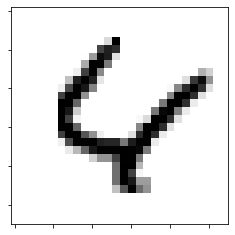

[Mode 8: {8: 1}] 


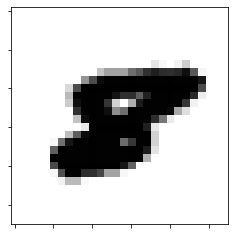

[Mode 1: {1: 1}] 


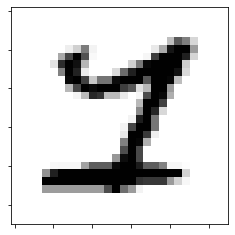

[Mode 4: {4: 1}] 


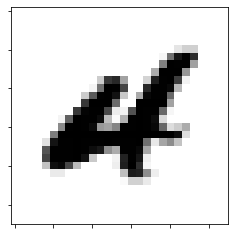

[Mode 2: {2: 1}] 


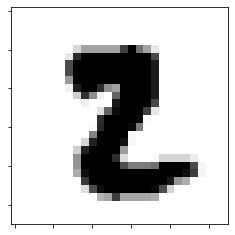

[Mode 2: {2: 1}] 


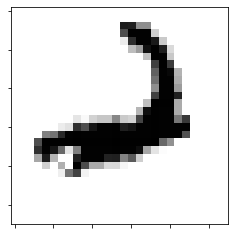

[Mode 2: {2: 1}] 


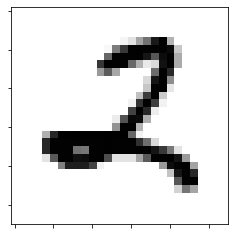

[Mode 3: {3: 1}] 


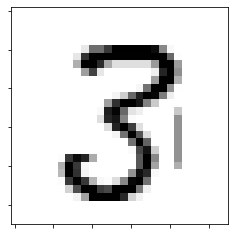

[Mode 5: {5: 1}] 


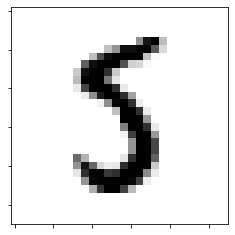

[Mode 2: {2: 1}] 


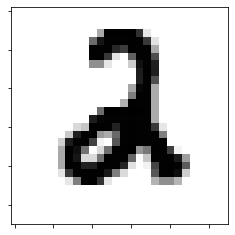

[Mode 4: {4: 1}] 


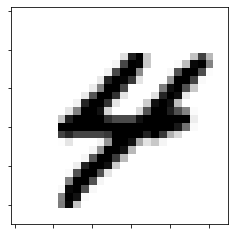

[Mode 3: {3: 1}] 


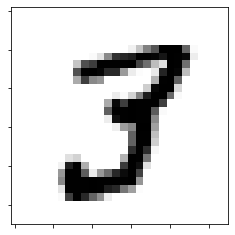

[Mode 2: {2: 1}] 


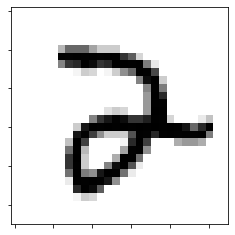

[Mode 8: {8: 1}] 


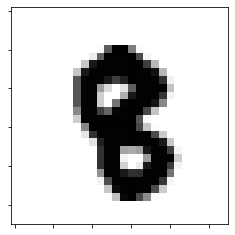

[Mode 6: {6: 1}] 


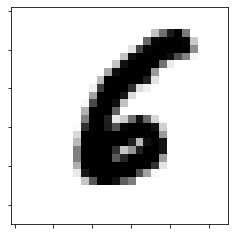

[Mode 2: {2: 1}] 


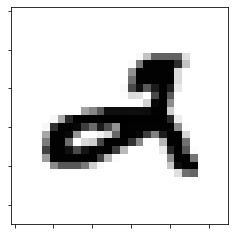

[Mode 7: {7: 1}] 


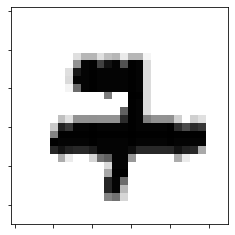

[Mode 9: {9: 1}] 


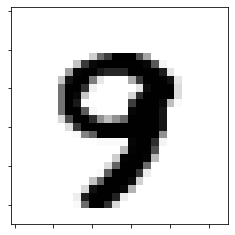

[Mode 4: {4: 1}] 


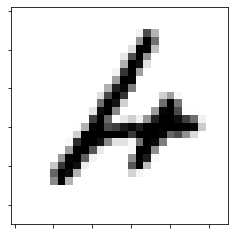

[Mode 2: {2: 1}] 


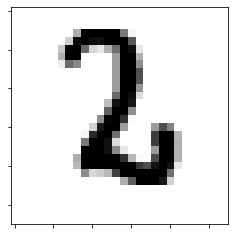

[Mode 8: {8: 1}] 


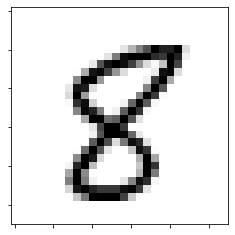

[Mode 2: {2: 1}] 


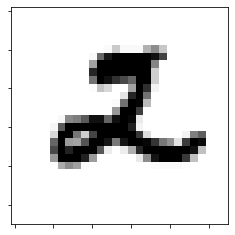

[Mode 5: {5: 1}] 


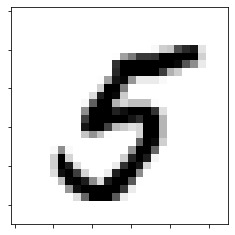

[Mode 3: {3: 1}] 


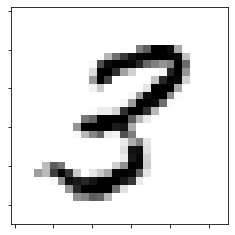

[Mode 8: {8: 1}] 


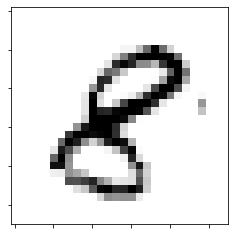

[Mode 2: {2: 1}] 


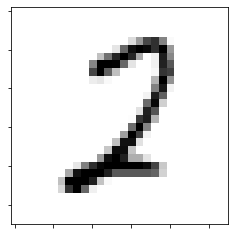

[Mode 7: {7: 1}] 


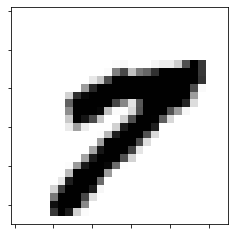

[Mode 3: {3: 1}] 


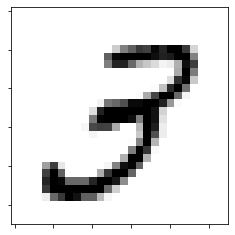

[Mode 7: {7: 1}] 


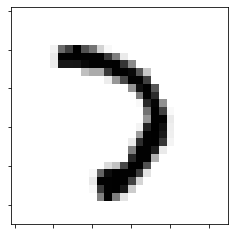

[Mode 7: {7: 1}] 


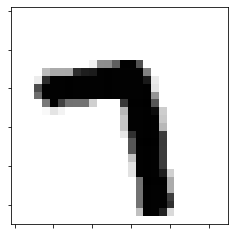

[Mode 5: {5: 1}] 


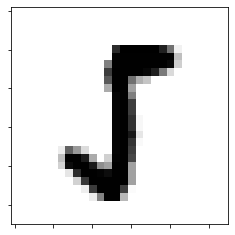

[Mode 2: {2: 1}] 


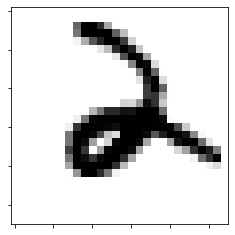

[Mode 4: {4: 1}] 


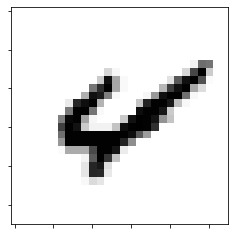

[Mode 2: {2: 1}] 


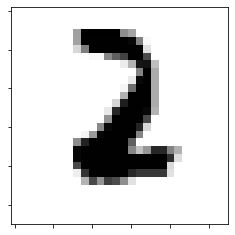

[Mode 8: {8: 1}] 


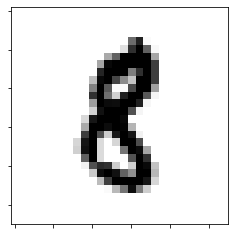

[Mode 3: {3: 1}] 


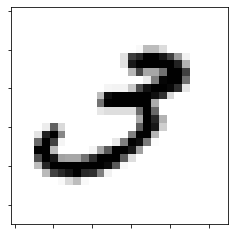

[Mode 2: {2: 1}] 


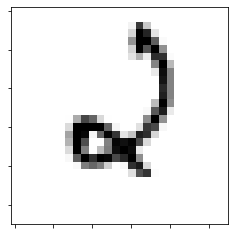

[Mode 4: {4: 1}] 


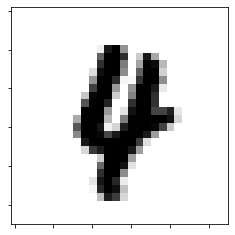

[Mode 8: {8: 1}] 


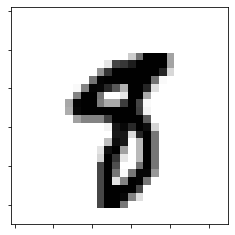

[Mode 8: {8: 1}] 


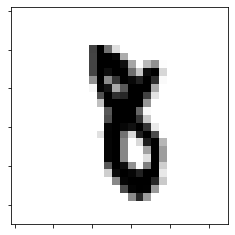

In [22]:
clusters_bad.plot_mean_digit()

## Trial

In [26]:
clusters_best

Cluster Data Split [Data: 385, Clusters: 15,Mean-per-Cluster: 25.666666666666668, Score: 0.8840503246753246] 

[[-6.92324165e+00 -1.06695320e+01]
 [-8.63062033e+00 -7.13940564e+00]
 [-9.63048069e+00 -2.72044935e+00]
 [-2.30647659e+00  5.30797676e+00]
 [-7.57005366e+00 -3.01446491e+00]
 [-1.00051011e+00  2.77905153e+00]
 [-4.81826839e+00 -2.77214822e+00]
 [-5.33964799e+00 -1.27625764e+00]
 [-7.94308840e+00 -3.89993901e+00]
 [-5.54924525e+00 -3.41298968e+00]
 [-5.14508990e+00 -9.54492198e+00]
 [-7.09669936e+00 -8.04074036e+00]
 [-5.82641512e+00 -1.96346196e+00]
 [-1.83198811e+00  3.52863145e+00]
 [-7.34267235e+00 -3.16546482e+00]
 [-7.34072825e+00 -6.92427252e+00]
 [-7.94653906e+00 -3.36768655e+00]
 [-8.24598536e+00 -8.61315821e+00]
 [-1.98197711e+00  4.02243551e+00]
 [-4.35098035e+00 -3.69476678e+00]
 [-1.04768696e+01 -3.60318139e+00]
 [-1.10195984e+01 -3.15882031e+00]
 [-5.17255904e+00 -4.31835971e+00]
 [-2.40671820e+00  6.09894447e+00]
 [-6.72149498e+00 -2.88440806e+00]
 [-6.58935963e+00 -4.43379548e+00]
 [-1.46126019e+00  4.52549851e+00]
 [-9.19003455e-01  3.45278927e+00]
 [-1.04093517e+01 -2

TypeError: '<=' not supported between instances of 'str' and 'int'

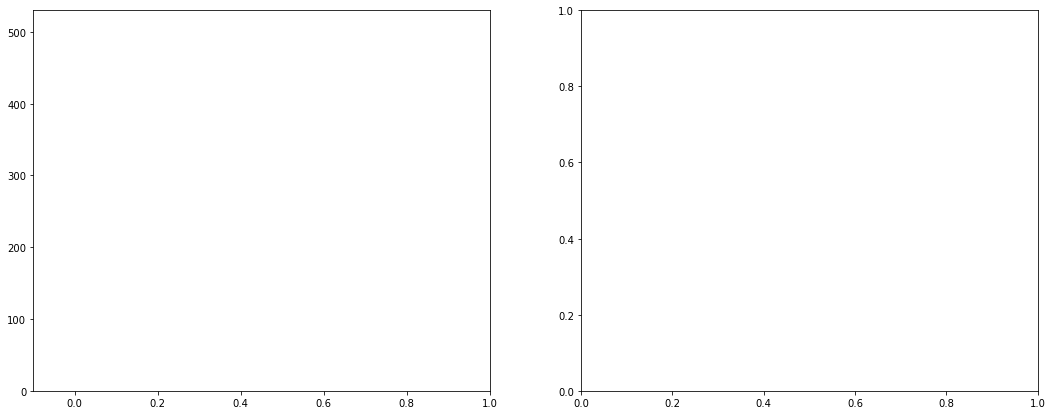

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    print(X)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
